# 通过梯度下降训练Logistic Regression模型

现在，我们的问题是如何解得最佳w，其能最小化Log loss：![cost_function](cost_function_T.png)

通过梯度下降求解。

## Gradient descent 又称steepest descent：通过一阶迭代优化的方式，最小化目标函数，的过程。
    
    w := w - ƞ∇w
![iteration](gradient_descent.png)

w经过足够的迭代更新后，学得的w,b可用于分类新样本x':
![for_new_sample](classification.png)

默认决策阈值是0.5，也可以是其他值。

**假阴**务必避免的情况：预警，预测火灾发生（positive)，阈值可以<0.5，如0.3

**假阳**务必避免的情况：品控，预测产品良品率，阈值可以>0.5，如0.7

# 从零实现Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(input):
    return 1.0/(1 + np.exp(-input))

### 基于当前的w计算y_hat：

In [3]:
def compute_prediction(X, weights):
    """Compute the prediction y_hat based on current weights
    Args:
        X (numpy.ndarray)
        weights (numpy.ndarray)
    Return:
        numpy.ndarray, y_hat of X under weights
    """
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return predictions

### w的更新函数：
![](gradient_descent.png)

In [4]:
def update_weights_gd(X_train, y_train, weights, learning_rate):
    """Update weights by one step
    Arg：
        X_train, y_train (np.ndarray, training data set)
        weights (np.ndarray)
        learning_rate (float)
    Return:
        numpy.ndarray, updated weights
    """
    predictions = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train-predictions)
    m = y_train.shape[0]
    weights += learning_rate / float(m) *weights_delta
    return weights

### 计算代价函数：
![cost_function](cost_function_T.png)

In [5]:
def compute_cost(X, y, weights):
    """Compute the cost J(w)
    Args:
        X, y (numpy.ndarray, data set)
        weights (numpy.ndarray)
    Returns:
        float
    """
    predictions = compute_prediction(X, weights)
    cost = np.mean(-y * np.log(predictions) - (1-y)*np.log(1-predictions))
    return cost

### 联合以上得到模型训练函数：
    每次迭代更新w；
    每100次迭代，print当前cost，确保cost确实在下降

In [6]:
def train_logistic_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    """Train a logistic regression model
    Args:
        X_train, y_train (numpy.nparray, training data set)
        max_iter (int, number of iterations)
        learning_rate (float)
        fit_intercept (bool, with an intercept w0 or not)
    Return:
        numpy.ndarray, learned weights
    """
    if fit_intercept: # 如果有w0，加一列
        intercept = np.ones((X_train.shape[0], 1)) 
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_gd(X_train,y_train,weights,learning_rate)
        if iteration % 100 == 0:
            print(compute_cost(X_train,y_train,weights))
    return weights

### 最好，用训练好的模型预测新样本：

In [7]:
def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1: # 新样本的特征数应与w数一致
        intercept = np.ones((X.shape[0],1))
        X = np.hstack((intercept, X))
    return compute_prediction(X, weights)

## 测试

In [9]:
X_train = np.array([[6, 7],
                    [2, 4],
                    [3, 6],
                    [4, 7],
                    [1, 6],
                    [5, 2],
                    [2, 0],
                    [6, 3],
                    [4, 1],
                    [7, 2]])

y_train = np.array([0,
                    0,
                    0,
                    0,
                    0,
                    1,
                    1,
                    1,
                    1,
                    1])

In [10]:
weights = train_logistic_regression(X_train, y_train, max_iter=1000,
                                    learning_rate=0.1,fit_intercept=True)

0.574404237166
0.0344602233925
0.0182655727085
0.012493458388
0.00951532913855
0.00769338806065
0.00646209433351
0.00557351184683
0.00490163225453
0.00437556774067


In [12]:
X_test = np.array([[6, 1],
                   [1, 3],
                   [3, 1],
                   [4, 5]])

In [13]:
predictions = predict(X_test, weights)

In [14]:
predictions

array([ 0.9999478 ,  0.00743991,  0.9808652 ,  0.02080847])

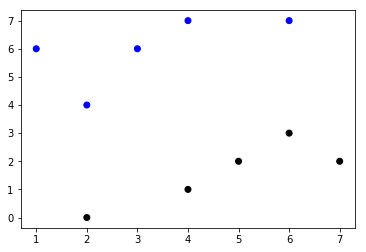

In [15]:
plt.scatter(X_train[:,0], X_train[:, 1], c=['b']*5+['k']*5, marker='o')

### 若阈值为0.5：

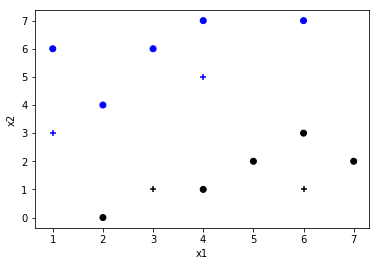

In [29]:
plt.scatter(X_train[:,0], X_train[:, 1], c=['b']*5+['k']*5, marker='o')
colors = ['k' if prediction >= 0.5 else 'b' for prediction in predictions]
plt.scatter(X_test[:,0], X_test[:,1],marker='+', c = colors)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()